# Using a Decision Tree 

Using the dataset **bet_table.csv**, a decision tree ML model can be trained to predict wether a bet with any condition is worth taking. To achieve this, the **bet_table.csv** will need to be altered before our model can be trained

In [184]:
# Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [185]:
# Read CSV
df = pd.read_csv('bet_table.csv')
print(df)

      Stakes  Odds  Available  Num_Runners Race_Type      Going  Days  \
0          2  2.90         41            6      FLAT  GOOD/SOFT    33   
1          2  7.20       1589           10    HURDLE       FIRM    19   
2          2  1.04        169           14    HURDLE      HEAVY     6   
3          2  2.26         75            9      FLAT       FAST    15   
4          5  1.83        248           16    HURDLE       SOFT    14   
...      ...   ...        ...          ...       ...        ...   ...   
3203       5  1.69        561            7     CHASE      HEAVY    37   
3204       5  9.60         41            6     CHASE      GOOD     79   
3205       2  1.44        846           10    HURDLE      GOOD     19   
3206       5  3.35         19            7     CHASE  GOOD/SOFT    62   
3207       2  1.21         46            7     CHASE      GOOD     22   

      Bet_Strength  Result  
0                2   LOSER  
1                3  WINNER  
2                2  WINNER  
3      

In the Result column, there are NON_RUNNER bets. These provide no information to our model as the outcome is never known. Getting a NON_RUNNER result is very likely due to other outside factors which our dataset does not have. Removing this will improve our model.

In [201]:
# Remove rows where the reuslt is equal to NON_RUNNER as it does not provide information to the model
df = df[df.Result != 'NON_RUNNER']
# Convert columns that are string values into int values
encoder = LabelEncoder()
df['Race_Type'] = encoder.fit_transform(df['Race_Type'])
df['Going'] = encoder.fit_transform(df['Going'])
df['Result'] = encoder.fit_transform(df['Result'])

# Remove results column from df so the dataset is split from X (inputs) and y (labels).
inputs = df.drop('Result', axis = 'columns')
labels = df['Result']

# Create a dictionary for result. Key : Int => Race_Type/Going/Result
result = {
    0 : "LOSER",
    1 : "WINNER"
}

In [202]:
# Split the dataset into training and testing datasets. We don't have a large dataset so 
# a 10 percent test size is chosen
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.1)

# Declare decision tree instance 
bet_tree = DecisionTreeClassifier(max_depth=3)
bet_tree.fit(X_train, y_train)
# Print params
bet_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [203]:
# Perform evaluation metrics on the model
bet_tree_score = bet_tree.score(X_test, y_test)
# Print score
print(f'Test set accuraccy tree: {tree_score}')

Test set accuraccy tree: 0.7924528301886793


Out of 321 bets, the model has succefully predicted the outcome correctly for 79% of the data. However, using accuracy as a statistic to determine the effectiveness of the model is not useful for this context. Calculating the precision score is more effective as False Negative bets are not important for the use of this model. To explain, if a bet resulted in a false negative result, no money will be lost. If a bet was taken and it resulted in a false positive, money will be lost. Therefore, it is better to determine the accuracy of our model by precision.

In [204]:
# Produce prediction from test set
y_pred = bet_tree.predict(X_test)
precision_score(y_test, y_pred)

0.7210884353741497

For all the bets where the model predicted the runner will be a winner, 73% was correct. This score indicated that our model is effective for the context as using this model to determine wether certain future should be taken, will be profitable. ( The score needs to be greater than 0.50 to be profitable).

It is also important to know what percentage of bets that resulted in winning the model got correct. This would be known as recall. A low score would mean that the model is overfitted with the dataset.

In [205]:
recall_score(y_test, y_pred)

0.7310344827586207

Only around 27% of bets were not taken that were successful. 

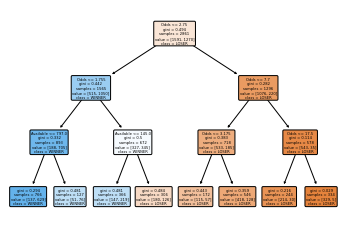

In [206]:
# Visualising the decision tree model
plt.figure()
tree.plot_tree(bet_tree,
               feature_names=X_train.columns,
               class_names=["LOSER", "WINNER"],
               rounded=True,
               filled=True)
plt.savefig('bet_tree_plot.png')

A future bet is coming up where there is £400 available at odds of 10, there are 8 runners,Race_Type=FLAT, Going=FIRM, Days=20 and Bet_Strength=4. We can use the model to predict wether the bet should be taken with either 2 or 5 pounds as stake.

In [207]:
# Predict outcome with 2 pounds as stake
result1 = bet_tree.predict([[2,10,400,8,1,1,20,4]])
print("The model has predicted the result for this bet with 2 pounds as stake will be",result[result1[0]])
result2 = bet_tree.predict([[5,10,400,8,1,1,20,4]])
print("The model has predicted the result for this bet with 5 pounds as stake will be",result[result2[0]])

The model has predicted the result for this bet with 2 pounds as stake will be LOSER
The model has predicted the result for this bet with 5 pounds as stake will be LOSER


C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


The model has predicted that using both stakes, the bet will result in the runner losing. Therefore, this bet should not be taken. This is likely due to the odds being too high. Furthermore, the conditions of the races are not optimal using the analysis from **BettingAnalysis.ipynb**. For race type, it was discovered that the most optimal was CHASE. FLAT race types produced a fairly signifcantly reduction in win rate. In addition it was stated to optimise bet selection, the number of runners in a race should be around 13 - 15. 8 runners is too far from the range and races with that many runners produced a significantly lower win rate. The other conditions for this bet were optimal enough, but the impact of those conditions was not enough to outweigh the conditions that were not optimal.